In [125]:
import pandas as pd 
import numpy as np
import seaborn as sns
import plotly.express as py
import matplotlib.pyplot as plt 

In [126]:
pip install plotly==4.8

Note: you may need to restart the kernel to use updated packages.


In [127]:
hscore1 = pd.read_csv("2015.csv")
hscore2 = pd.read_csv("2016.csv")
hscore3 = pd.read_csv("2017.csv")
hscore4 = pd.read_csv("2018.csv")
hscore5 = pd.read_csv("2019.csv")

In [128]:
hscore1.shape

(158, 12)

In [149]:
hscore1.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [129]:
hscore2.shape

(157, 13)

In [130]:
# check that the shapes look reasonable after combining 
hscore = pd.merge(left=hscore1, right=hscore2, how="inner",on='Country',suffixes = ("_2015", "_2016"))
hscore.shape

(151, 24)

In [131]:
count_missing = hscore.isnull().sum()
print(count_missing.sort_values(ascending = False))

Country                               0
Region_2015                           0
Generosity_2016                       0
Trust (Government Corruption)_2016    0
Freedom_2016                          0
Health (Life Expectancy)_2016         0
Family_2016                           0
Economy (GDP per Capita)_2016         0
Upper Confidence Interval             0
Lower Confidence Interval             0
Happiness Score_2016                  0
Happiness Rank_2016                   0
Region_2016                           0
Dystopia Residual_2015                0
Generosity_2015                       0
Trust (Government Corruption)_2015    0
Freedom_2015                          0
Health (Life Expectancy)_2015         0
Family_2015                           0
Economy (GDP per Capita)_2015         0
Standard Error                        0
Happiness Score_2015                  0
Happiness Rank_2015                   0
Dystopia Residual_2016                0
dtype: int64


In [132]:
regions = hscore["Region_2015"].value_counts()
fig = py.pie(labels = regions.index, values = regions.values, title = "The percentage of countries in each region", names = regions.index)
fig.show()

In [133]:
fig = py.pie(labels = regions.index, values = regions.values, title = "The percentage of countries in each region", names = regions.index, hole = 0.7)
fig.show()

In [195]:
hscore["happiness_score_combined"] = hscore["Happiness Score_2015"] + hscore["Happiness Score_2016"]
means = hscore['Region_2015'].groupby('happiness_score_combined').mean()
means.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,20),legend = False)

KeyError: 'happiness_score_combined'

"which one is the lowest? which one is the highest?"

In [135]:
years = [2015,2016,2017,2018,2019]

def clean_col(col):
    col = col.strip()
    col = col.replace("(","")
    col = col.replace(")","")
    col = col.replace(" ","_")
    col = col.replace(".","_")
    col = col.lower()
    return col

df_combined = {}
for a_year in years:
    df = pd.read_csv(f"{a_year}.csv")
    df['Year'] = int(a_year)
    new_columns = []
    for col in df.columns:
        c= clean_col(col)
        new_columns.append(c)
    df.columns = new_columns 
    print(df.columns)
    df_combined[a_year] = df    
    
df_combined[2018].rename({"overall_rank":"happiness_rank"}, axis= 1, inplace=True)  
df_combined[2019].rename({"overall_rank":"happiness_rank"}, axis= 1, inplace=True)   

df_combined[2018].rename({"country_or_region":"country"},axis= 1, inplace=True)
df_combined[2019].rename({"country_or_region":"country"},axis= 1, inplace=True)

df_combined[2018].rename({"score":"happiness_score"},axis= 1, inplace=True)
df_combined[2019].rename({"score":"happiness_score"},axis= 1, inplace=True)

df_combined[2015].rename({"economy_gdp_per_capita":"gdp_per_capita"},axis= 1, inplace=True)
df_combined[2016].rename({"economy_gdp_per_capita_":"gdp_per_capita"},axis= 1, inplace=True)
df_combined[2017].rename({"economy_gdp_per_capita":"gdp_per_capita"},axis= 1, inplace=True)
    
hscore_all = pd.concat(df_combined, ignore_index = True)
hscore_all.sample(10)

Index(['country', 'region', 'happiness_rank', 'happiness_score',
       'standard_error', 'economy_gdp_per_capita', 'family',
       'health_life_expectancy', 'freedom', 'trust_government_corruption',
       'generosity', 'dystopia_residual', 'year'],
      dtype='object')
Index(['country', 'region', 'happiness_rank', 'happiness_score',
       'lower_confidence_interval', 'upper_confidence_interval',
       'economy_gdp_per_capita', 'family', 'health_life_expectancy', 'freedom',
       'trust_government_corruption', 'generosity', 'dystopia_residual',
       'year'],
      dtype='object')
Index(['country', 'happiness_rank', 'happiness_score', 'whisker_high',
       'whisker_low', 'economy__gdp_per_capita_', 'family',
       'health__life_expectancy_', 'freedom', 'generosity',
       'trust__government_corruption_', 'dystopia_residual', 'year'],
      dtype='object')
Index(['overall_rank', 'country_or_region', 'score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',

,country,region,happiness_rank,happiness_score,standard_error,gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,...,economy_gdp_per_capita,whisker_high,whisker_low,economy__gdp_per_capita_,health__life_expectancy_,trust__government_corruption_,social_support,healthy_life_expectancy,freedom_to_make_life_choices,perceptions_of_corruption
567,Somalia,NaN,98,4.982,NaN,0.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.712,0.115,0.674,0.282
48,Bahrain,Middle East and Northern Africa,49,5.960,0.05412,1.32376,1.21624,0.74716,0.45492,0.30600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
514,Kuwait,NaN,45,6.083,NaN,1.47400,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.301,0.675,0.554,0.106
177,Luxembourg,Western Europe,20,6.871,NaN,NaN,1.03999,0.84542,0.54870,0.35329,...,1.69752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,Albania,Central and Eastern Europe,109,4.655,NaN,NaN,0.50163,0.73007,0.31866,0.05301,...,0.95530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,Sweden,Western Europe,10,7.291,NaN,NaN,1.08764,0.83121,0.58218,0.40867,...,1.45181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,Chile,Latin America and Caribbean,24,6.705,NaN,NaN,0.90587,0.81883,0.37789,0.11451,...,1.21670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
741,Armenia,NaN,116,4.559,NaN,0.85000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.055,0.815,0.283,0.064
256,Greece,Western Europe,99,5.033,NaN,NaN,0.75473,0.80029,0.05822,0.04127,...,1.24886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
hscore_all.notna()

,country,region,happiness_rank,happiness_score,standard_error,gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,...,economy_gdp_per_capita,whisker_high,whisker_low,economy__gdp_per_capita_,health__life_expectancy_,trust__government_corruption_,social_support,healthy_life_expectancy,freedom_to_make_life_choices,perceptions_of_corruption
0,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
4,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,True,False,True,True,False,True,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
778,True,False,True,True,False,True,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
779,True,False,True,True,False,True,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
780,True,False,True,True,False,True,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True


In [136]:
happiness_2019 = hscore_all[hscore_all['year'] == '2019']


top_5_2019 = hscore_all.nlargest(10, 'happiness_score')

fig = py.bar(top_5_2019, x="country",y="gdp_per_capita",color ="country")
fig.show()

In [172]:
countries_of_interest = ['United States', 'Singapore', 'South Korea']
fig = py.bar(hscore_all[hscore_all['country'].isin(countries_of_interest)], 
              x="year", 
              y="happiness_score", 
              color='country', barmode ="group")
fig.show()


TypeError: add_trace() got an unexpected keyword argument 'x'

(array([ 7.,  4., 13., 35., 29., 39., 62., 64., 42., 67., 61., 44., 79.,
        47., 56., 28., 34., 20., 38., 13.]),
 array([2.69300008, 2.94680007, 3.20060007, 3.45440007, 3.70820006,
        3.96200006, 4.21580005, 4.46960005, 4.72340005, 4.97720004,
        5.23100004, 5.48480004, 5.73860003, 5.99240003, 6.24620002,
        6.50000002, 6.75380002, 7.00760001, 7.26140001, 7.5152    ,
        7.769     ]),
 <BarContainer object of 20 artists>)

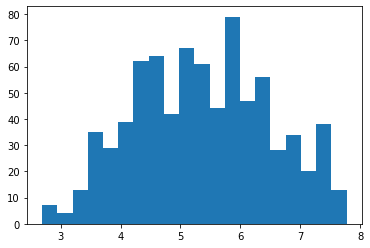

In [138]:
happiness_freq = hscore_all["happiness_score"].value_counts(bins=10).sort_index 
plt.hist(hscore_all["happiness_score"], bins= 20)

In [139]:
# Before plotting the line graph, one need to convert the string to datetime format
hscore_all['year'] = pd.to_datetime(hscore_all['year'],format='%Y')
hscore_all['year'] = hscore_all['year'].dt.year
print(hscore_all['year'])

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
777    2019
778    2019
779    2019
780    2019
781    2019
Name: year, Length: 782, dtype: int64


In [140]:
# See what are the countries avaliable in the data set, choose a country of interest 
print(hscore_all["country"].unique())
counts = hscore_all["country"].value_counts().to_dict()
counts["Finland"]

['Switzerland' 'Iceland' 'Denmark' 'Norway' 'Canada' 'Finland'
 'Netherlands' 'Sweden' 'New Zealand' 'Australia' 'Israel' 'Costa Rica'
 'Austria' 'Mexico' 'United States' 'Brazil' 'Luxembourg' 'Ireland'
 'Belgium' 'United Arab Emirates' 'United Kingdom' 'Oman' 'Venezuela'
 'Singapore' 'Panama' 'Germany' 'Chile' 'Qatar' 'France' 'Argentina'
 'Czech Republic' 'Uruguay' 'Colombia' 'Thailand' 'Saudi Arabia' 'Spain'
 'Malta' 'Taiwan' 'Kuwait' 'Suriname' 'Trinidad and Tobago' 'El Salvador'
 'Guatemala' 'Uzbekistan' 'Slovakia' 'Japan' 'South Korea' 'Ecuador'
 'Bahrain' 'Italy' 'Bolivia' 'Moldova' 'Paraguay' 'Kazakhstan' 'Slovenia'
 'Lithuania' 'Nicaragua' 'Peru' 'Belarus' 'Poland' 'Malaysia' 'Croatia'
 'Libya' 'Russia' 'Jamaica' 'North Cyprus' 'Cyprus' 'Algeria' 'Kosovo'
 'Turkmenistan' 'Mauritius' 'Hong Kong' 'Estonia' 'Indonesia' 'Vietnam'
 'Turkey' 'Kyrgyzstan' 'Nigeria' 'Bhutan' 'Azerbaijan' 'Pakistan' 'Jordan'
 'Montenegro' 'China' 'Zambia' 'Romania' 'Serbia' 'Portugal' 'Latvia'
 'Philip

5

Go back to clean the dataset 

In [141]:
country_of_interest = "China"
china = hscore_all[hscore_all["country"] == "China"]
print(china["happiness_score"])

83     5.140
240    5.245
393    5.273
555    5.246
718    5.191
Name: happiness_score, dtype: float64


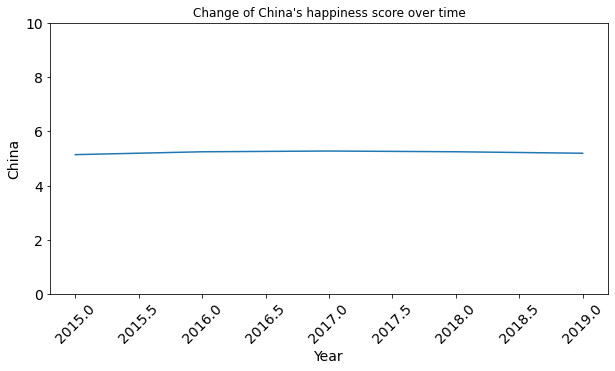

In [152]:
plt.figure(figsize=(10,5))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('China', fontsize=14)
plt.ylim(0, 10)
plt.title("Change of China's happiness score over time")
plt.plot(china["year"], china["happiness_score"])


In [143]:
country_of_interest = "Israel"
Israel= hscore_all[hscore_all["country"] == "Iceland"]
print(Israel["happiness_score"])

1      7.561
160    7.501
317    7.504
473    7.495
629    7.494
Name: happiness_score, dtype: float64


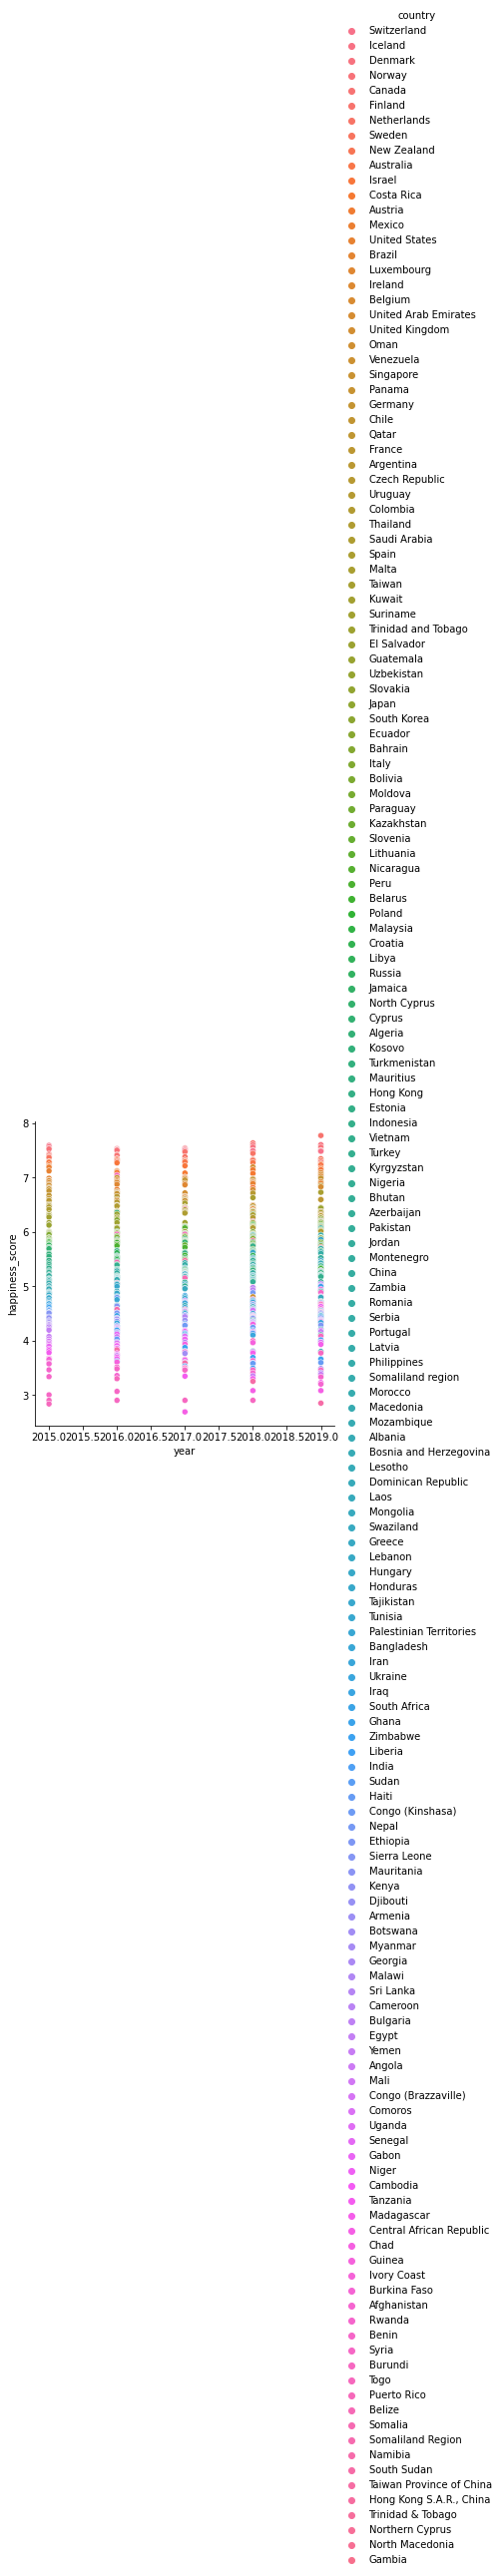

In [167]:
sns.relplot(data=hscore_all, x="year", y="happiness_score",hue="country")

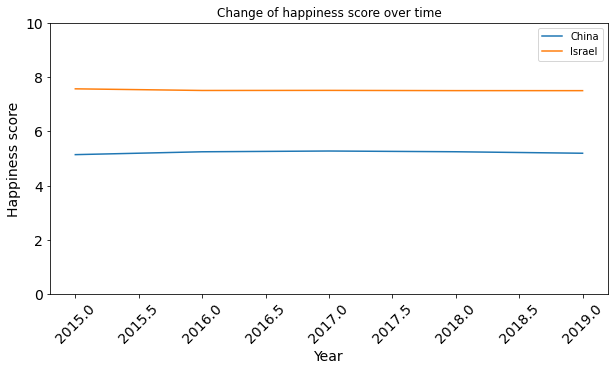

In [144]:
plt.figure(figsize=(10,5))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Happiness score', fontsize=14)
plt.ylim(0, 10)
plt.title("Change of happiness score over time")
plt.plot(china["year"], china["happiness_score"],label = "China")
plt.plot(Israel["year"], Israel["happiness_score"],label = "Israel")
plt.legend()
plt.show()

In [173]:
Israel= hscore_all[hscore_all["country"] == "Iceland"]["happiness_score"]
fig = px.line(Israel, x="year", y="country", title="", color = "country")
fig.show()

NameError: name 'px' is not defined

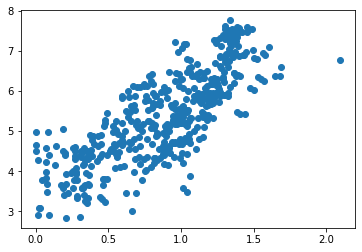

In [145]:
plt.scatter(hscore_all['gdp_per_capita'], hscore_all['happiness_score'])

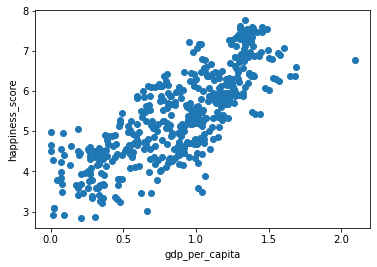

In [146]:
plt.scatter(hscore_all['gdp_per_capita'], hscore_all['happiness_score'])
plt.xlabel('gdp_per_capita')
plt.ylabel('happiness_score')
plt.show()

<AxesSubplot:>

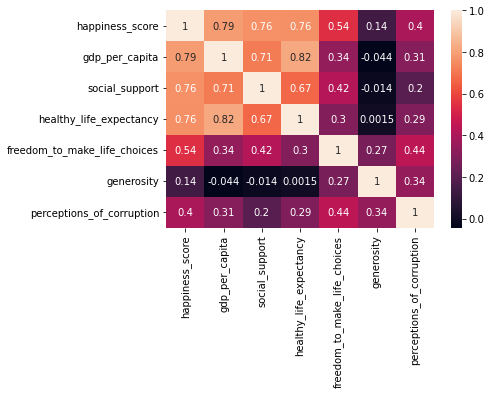

In [147]:
sns.heatmap(data = hscore_all[['happiness_score', 'gdp_per_capita',
                                     'social_support', 'healthy_life_expectancy',
                                     'freedom_to_make_life_choices', 'generosity',
                                     'perceptions_of_corruption']].corr() , annot = True)

In [148]:
def v-()

SyntaxError: invalid syntax (266268193.py, line 1)